# This notebook looks at insights generated using the Ampath Patient dataset from Microsoft Dynamics 365 Business Central

In [ ]:
! pip install -q pandas numpy matplotlib seaborn

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_file(file_path, sheet_name=0):
    """Reads data from an Excel or CSV file."""
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith(('.xls', '.xlsx')):
        return pd.read_excel(file_path, sheet_name=sheet_name)
    else:
        raise ValueError("Unsupported file format. Please provide an Excel or CSV file.")

# Dataset Overview

This analysis is based on patient information available in Microsoft Dynamics 365 Business Central, extracted via an API integration with AMPATH. The dataset has been systematically collected over the past year and currently includes records for over 950 patients. To date, more than 400 successful deliveries have been recorded, demonstrating the efficiency and impact of the system in managing patient care and medication distribution. It is also important to note that all existing patients are scheduled for the ART medication.

The dataset provides comprehensive insights into patient demographics, medication details, and delivery logistics, allowing for improved tracking and optimization of healthcare services.

# Key Data Points Available in the Dataset:
**Patient Demographics:** <br>
1. Full Name <br>
2. Age <br>
3. Gender <br>
4. Contact Information (Phone Number) <br>

**Medication Information:** <br>
1. Prescribed Medication Type <br>

**Delivery Details:** <br>
1. Expected Next Delivery Date <br>
2. Delivery Location including:
 * County <br>
 * Address <br>
 * Nearest Landmark <br>

**This dataset serves as a critical resource for:** <br>
1. Analyzing patient trends <br>
1. Ensuring timely medication deliveries <br>
1. Optimizing healthcare service delivery <br>

# Market Opportunity & Impact

**Question: What problem does this solution address, and how significant is the market?** <br>
1. **The Problem**:ART Adherence & Timely Medication Delivery
HIV/AIDS remains a significant public health challenge, with over 1.4 million people living with HIV in Kenya as of recent reports. One of the biggest barriers to effective treatment is low adherence to Antiretroviral Therapy (ART), often caused by:

 * Missed doses due to logistical issues (patients unable to access medication in time). <br>
 * Stockouts or inefficient distribution systems within healthcare facilities. <br>
 * Limited tracking of patient adherence, leading to interruptions in treatment. <br>
 * Non-adherence increases the risk of drug resistance, disease progression, and higher mortality rates. Therefore, an efficient, data-driven medication distribution system is essential for improving patient outcomes.

2. **The Solution**: Data-Driven ART Distribution via Microsoft Dynamics 365 Business Central
The dataset provides a systematic and automated approach to tracking patient medication needs and ensuring timely deliveries. Key features include:

 * Real-time tracking of ART prescriptions to ensure timely refills. <br>
 * Automated scheduling of medication deliveries to minimize missed doses. <br>
 * Geolocation-based logistics planning, optimizing delivery routes for efficiency. <br>
 * Integration with AMPATH, enabling accurate, centralized patient data management. <br>
This system not only improves ART adherence rates but also reduces the burden on healthcare facilities by streamlining patient care management.

3. **Market Size & Scalability Potential** 
Currently, the dataset includes 950+ patients, demonstrating the successful implementation of the system. However, the market potential extends far beyond this:

 * National Expansion: Kenya has over 1.4 million HIV-positive individuals, representing a vast pool of potential beneficiaries. <br>
 * Regional Growth: The East African region (Uganda, Tanzania, Rwanda) faces similar challenges in ART adherence, creating cross-border scalability opportunities. <br>
 * Government & NGO Partnerships: Organizations such as PEPFAR, UNAIDS, and Kenya’s Ministry of Health actively fund HIV programs, presenting investment and funding opportunities. <br>

4. **Competitive Advantage & Unique Selling Proposition (USP)**
Unlike traditional ART distribution methods, this system:
 * Uses data analytics to predict and prevent medication lapses. <br>
 * Automates delivery schedules, reducing reliance on manual tracking. <br>
 * Improves patient retention through efficient service delivery. <br>
 * Offers integration with AMPATH and other health systems for seamless data flow. <br>

# Gender Distribution Analysis

This analysis presents the distribution of patient demographics based on gender using a bar chart. It provides insights into the proportion of male and female patients, helping healthcare providers understand population trends and make data-driven decisions.

**Chart Details** <br>
✅ X-axis: Patient gender categories <br>
✅ Y-axis: Total count of patients in each gender category <br>
✅ Title: Gender distribution among patients <br>

**What the data shows**:<br>
✅ Women constitute the majority, making up 68.7% of the total patient population. <br>
✅ Men represent 31.3%, indicating a significantly smaller proportion. <br>
✅ This distribution suggests potential gender-related healthcare access or engagement trends that may require further analysis.


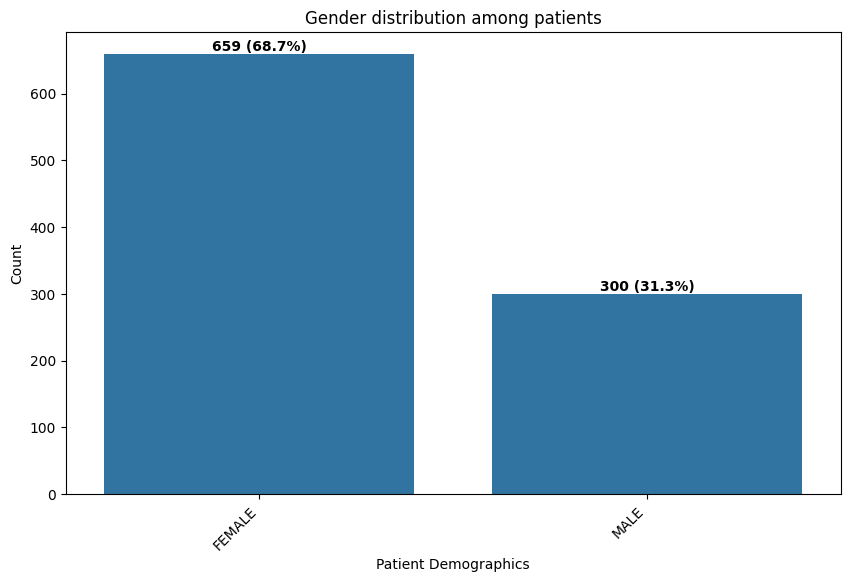

In [103]:
def plot_bar_chart(df, column):
    """Plots a bar chart for patient demographics with total counts and percentages."""
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df[column], order=df[column].value_counts().index)
    
    total_count = len(df)
    
    # Adding value labels with percentages
    for p in ax.patches:
        count = int(p.get_height())
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.1f}%)', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    
    plt.xticks(rotation=45, ha='right')
    plt.title('Gender distribution among patients')
    plt.xlabel('Patient Demographics')
    plt.ylabel('Count')
    plt.show()
    
if __name__ == "__main__":
    file_path = "Patient List.xlsx"
    sheet_name = 0  # Change if needed
    
    df = read_file(file_path, sheet_name)
    
    plot_bar_chart(df, 'Customer Demographics Code')

# Age Range Distribution Analysis

This analysis illustrates the distribution of patients across different age groups using a bar chart. It provides insights into the age composition of the patient population, helping identify trends and support strategic decision-making in patient care and resource allocation.

**Chart Details**:<br>
✅ X-axis: Age range categories <br>
✅ Y-axis: Total count of patients in each age group <br>
✅ Title: Age range distribution among patients <br>

**What the data shows**: <br>
✅ Older adults (40+ years) make up the majority of the patient population, accounting for 79% of the total count. <br>
✅ Younger age groups (20-24 and below) represent the smallest segment, contributing less than 1% of the total patient count. <br>
✅ The significant concentration of patients in older age groups highlights the need for age-specific healthcare services, chronic disease management, and preventive care programs.

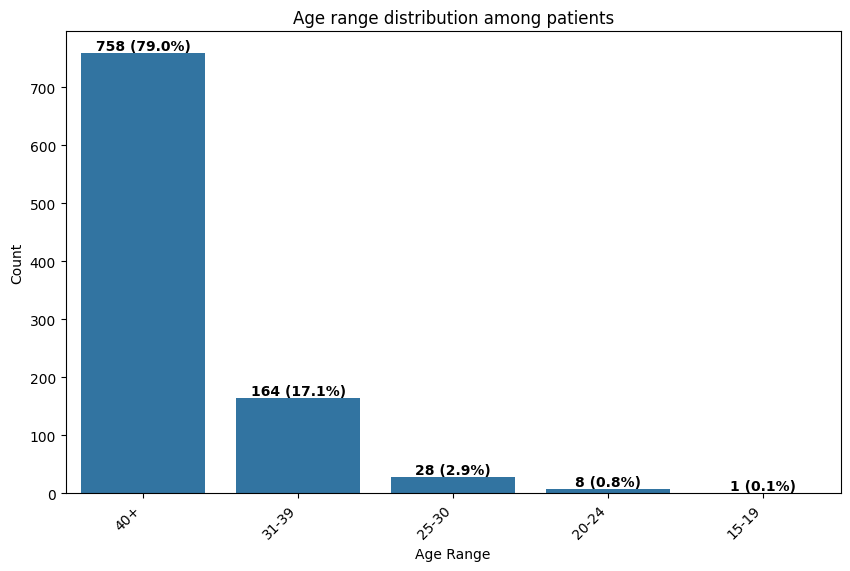

In [104]:
def plot_bar_chart(df, column, title):
    """Plots a bar chart for patient demographics with total counts and percentages."""
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df[column], order=df[column].value_counts().index)
    
    total_count = len(df)
    
    # Adding value labels with percentages
    for p in ax.patches:
        count = int(p.get_height())
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.1f}%)', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

if __name__ == "__main__":
    file_path = "Patient List.xlsx"
    sheet_name = 0  # Change if needed
    
    df = read_file(file_path, sheet_name)
    plot_bar_chart(df, 'Age Range', 'Age range distribution among patients')


# HIV Patient Distribution by County

This analysis examines the distribution of HIV patients across different counties, highlighting regional trends in treatment access, demographic variations, and potential healthcare needs. By visualizing county-level data, healthcare providers can optimize resource allocation, outreach programs, and HIV intervention strategies.

**Chart Details**:<br>
✅ X-axis: Counties<br>
✅ Y-axis: Count of HIV patients<br>
✅ Hue: Gender distribution (Customer Demographics Code)<br>
✅ Title: Distribution of HIV patients across counties<br>

**What the data shows**:<br>
✅ Uasin Gishu County has the highest number of HIV patients, with 449 individuals, accounting for 47.2% of the total patient population in this dataset.<br>
✅ Nairobi, Busia and Narok have the lowest representation, each contributing less than 1%. However, this is influenced by the dataset's regional focus, which has a higher concentration in Western counties.<br>
✅ The uneven distribution highlights regional disparities in HIV treatment access, which may be linked to population density, healthcare facility availability, and community engagement in HIV care.<br>


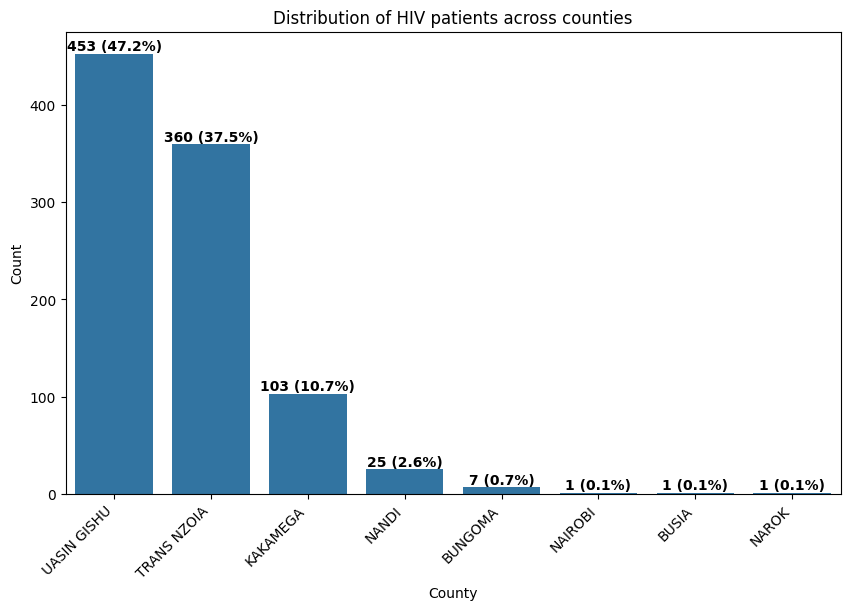

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_file(file_path, sheet_name):
    """Reads an Excel file and returns a DataFrame."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def plot_bar_chart(df, column, title):
    """Plots a bar chart for patient demographics with total counts and percentages."""
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df[column], order=df[column].value_counts().index)
    
    total_count = len(df)
    
    # Adding value labels with percentages
    for p in ax.patches:
        count = int(p.get_height())
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.1f}%)', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    
if __name__ == "__main__":
    file_path = "Patient List.xlsx"
    sheet_name = 0  # Change if needed
    
    df = read_file(file_path, sheet_name)
    plot_bar_chart(df, 'County', 'Distribution of HIV patients across counties')

# HIV Patient Consent Date Distribution

This analysis examines the distribution of patient consent dates for HIV treatment and services, grouped by month. By identifying trends in when patients consent to care, healthcare providers can optimize patient engagement strategies, resource planning, and outreach efforts.

**Chart Details**<br>
✅ X-axis: Month of consent<br>
✅ Y-axis: Count of patients who consented in each month<br>
✅ Title: Monthly distribution of patient consent for HIV care<br>

**What the data shows**:<br>
✅ The available data dates back to January 2024, providing a full-year view of consent trends.<br>
✅ The highest patient consent rates occurred between September 2024 and November 2024, with October 2024 recording the peak at 24.8% of total consents.<br>
✅ January 2024 and February 2024 recorded the lowest consent rates, likely due to data collection gaps, fewer outreach activities, or delays in patient enrollment.<br>


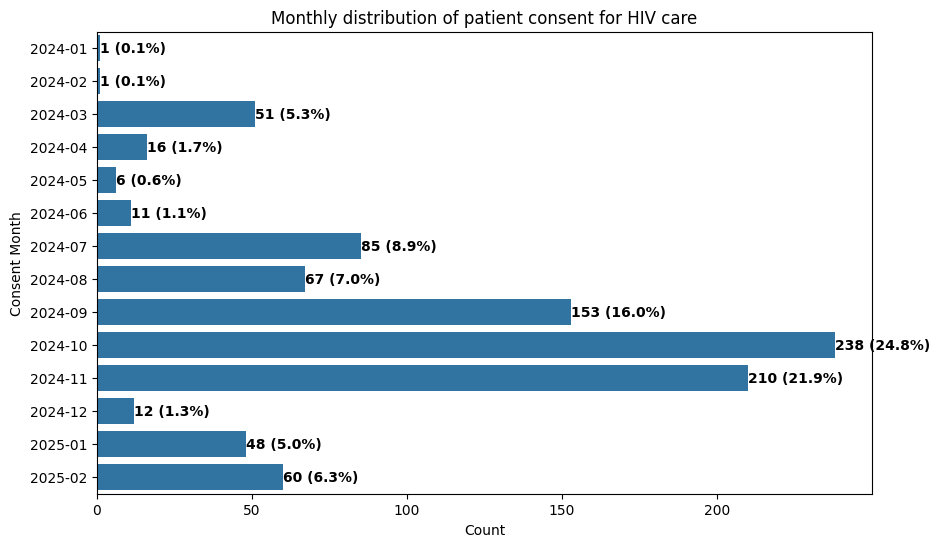

In [106]:
def plot_bar_chart(df, column, title, order=None):
    """Plots a horizontal bar chart for patient demographics with total counts and percentages."""
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=df[column], order=order if order else df[column].value_counts().index, orient='h')
    
    total_count = len(df)
    
    # Adding value labels with percentages
    for p in ax.patches:
        count = int(p.get_width())
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.1f}%)', 
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black', fontweight='bold')
    
    plt.ylabel(column)
    plt.xlabel('Count')
    plt.title(title)
    plt.show()

def plot_date_consented_by_month(df, date_column):
    """Plots a horizontal bar chart showing the distribution of consents grouped by month in chronological order."""
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df['Consent Month'] = df[date_column].dt.to_period('M').astype(str)
    month_order = sorted(df['Consent Month'].dropna().unique())
    
    plot_bar_chart(df, 'Consent Month', 'Monthly distribution of patient consent for HIV care', order=month_order)
    
if __name__ == "__main__":
    file_path = "Patient List.xlsx"
    sheet_name = 0  # Change if needed
    
    df = read_file(file_path, sheet_name)
    plot_date_consented_by_month(df, 'Date Consented')

# AMPATH ART Medication Deliveries Over the Past Year

This analysis examines shipment trends for ART (Antiretroviral Therapy) medication across different counties over the past year. By visualizing the number of deliveries per county per month, healthcare providers can assess distribution efficiency, regional demand, and gaps in ART supply coverage.

**Chart Details**<br>
✅ X-axis: Months (Year-Month) <br>
✅ Y-axis: Shipment count <br>
✅ Hue: County <br>
✅ Title: Delivery distribution across counties over time <br>

**What the data shows**: <br>
✅ Uasin Gishu recorded the highest ART medication deliveries throughout most months, except for January 2025, when Trans Nzoia led in deliveries.<br>
✅ Kakamega, Bungoma, and Nandi had consistently low shipment counts, indicating potential challenges in medication access, distribution logistics, or patient coverage.<br>


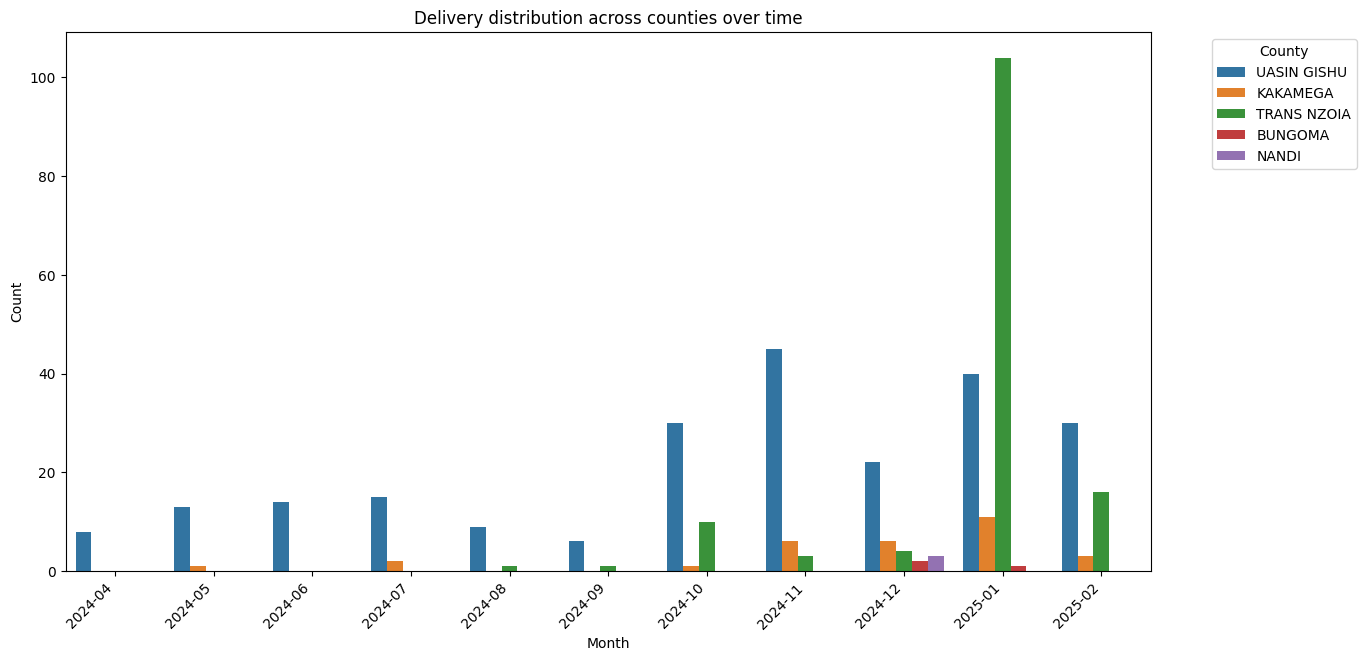

In [107]:
def plot_shipment_by_county_and_month(df, date_column, county_column):
    """Plots a grouped bar graph showing shipment count per county for each month."""
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df['Year-Month'] = df[date_column].dt.to_period('M')
    grouped_df = df.groupby(['Year-Month', county_column]).size().reset_index(name='count')
    
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Year-Month', y='count', hue=county_column, data=grouped_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Delivery distribution across counties over time')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

if __name__ == "__main__":
    file_path = "Ampath Deliveries.xlsx"
    sheet_name = 0 
    
    df = read_file(file_path, sheet_name)    
    plot_shipment_by_county_and_month(df, 'Shipment Date', 'County')

# Expected Next ART Medication Delivery Dates

This analysis examines the projected delivery dates for ART (Antiretroviral Therapy) medication across different counties in the coming months. By visualizing the expected delivery schedule, healthcare providers can anticipate supply demands, ensure timely medication availability, and prevent treatment interruptions for patients.

**Chart Details**: <br>
✅ X-axis: Months (Year-Month) <br>
✅ Y-axis: Expected shipment count <br>
✅ Hue: County <br>
✅ Title: Projected ART medication deliveries across counties <br>

**What the data shows**: <br>
✅ The number of expected deliveries is progressively reducing, unlike January and February 2025, which recorded high volumes of projected deliveries. This decline could be due to limited data availability at the time of analysis or fluctuations in supply chain scheduling. <br>
✅ Some counties may experience stock shortages if deliveries continue to decline, emphasizing the need for proactive supply chain management and demand forecasting. <br>
✅ Counties with consistently low expected deliveries might require logistical improvements, increased patient outreach, or adjustments in ART distribution planning. <br>


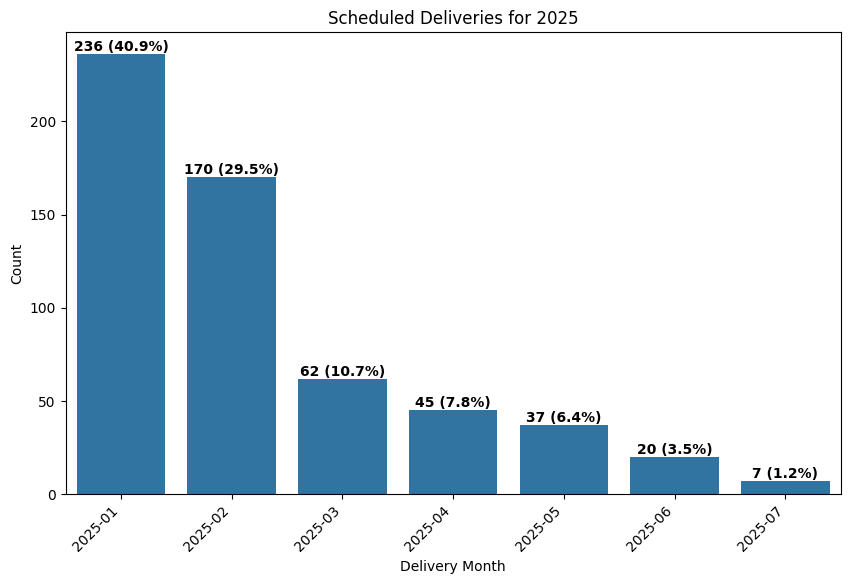

In [108]:
def plot_bar_chart(df, column, title, order=None):
    """Plots a vertical bar chart for patient demographics with total counts and percentages."""
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df[column], order=order if order else df[column].value_counts().index)
    
    total_count = len(df)
    
    # Adding value labels with percentages
    for p in ax.patches:
        count = int(p.get_height())
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.1f}%)', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.show()

def plot_expected_delivery_2025(df, date_column):
    """Plots a vertical bar chart for expected next delivery dates in 2025 grouped by month."""
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df_2025 = df[df[date_column].dt.year == 2025].copy()  # Explicitly create a copy
    df_2025['Delivery Month'] = df_2025[date_column].dt.to_period('M').astype(str)
    month_order = sorted(df_2025['Delivery Month'].dropna().unique())
    
    plot_bar_chart(df_2025, 'Delivery Month', 'Scheduled Deliveries for 2025', order=month_order)
    
if __name__ == "__main__":
    file_path = "Patient List.xlsx"
    sheet_name = 0  # Change if needed
    
    df = read_file(file_path, sheet_name)
    plot_expected_delivery_2025(df, 'Expected Next Delivery Date')

# Comparison Between the AMPATH Patients Dataset in Dynamics vs. LTFU Dataset

An initial analysis of the AMPATH patient data in Dynamics and the LTFU dataset reveals that the two datasets share a common identifier—the EMR Person ID (Patient Identifier). However, despite this shared identifier, merging the datasets is not feasible due to significant differences in data structure, scope, and purpose.

# Key Identifiers in Each Dataset:

**AMPATH Patient Dataset (Dynamics)**: <br>
✅CCC Patient Identifier <br>
✅EMR Person ID <br>

**LTFU Dataset**: <br>
✅Patient Identifier (sole unique identifier)

**Challenges Preventing Dataset Integration**: <br>
✅Significant Difference in Data Volume <br>
The LTFU dataset spans over 25 years and contains millions of records, making it a large, historical dataset.
The AMPATH patient dataset in Dynamics, on the other hand, is much smaller, containing fewer than 1,000 records collected over the past year. <br>

✅Differences in Dataset Scope and Purpose <br>
The LTFU dataset is primarily medication-focused, tracking treatment history and lost-to-follow-up cases.
The AMPATH patient dataset in Dynamics is delivery-focused, mainly containing details on medication deliveries to patients.
Apart from the shared patient identifier, there is no overlapping information between the two datasets, making integration impractical.

**Conclusion and Recommendation** <br>
Given these differences, it is recommended to maintain the datasets separately, as they serve distinct purposes. Attempting to merge them would not provide meaningful insights due to the lack of common data points beyond the patient identifier.